<a href="https://colab.research.google.com/github/mutai-star/db_demo/blob/master/Sentiment_Analysis_project_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[

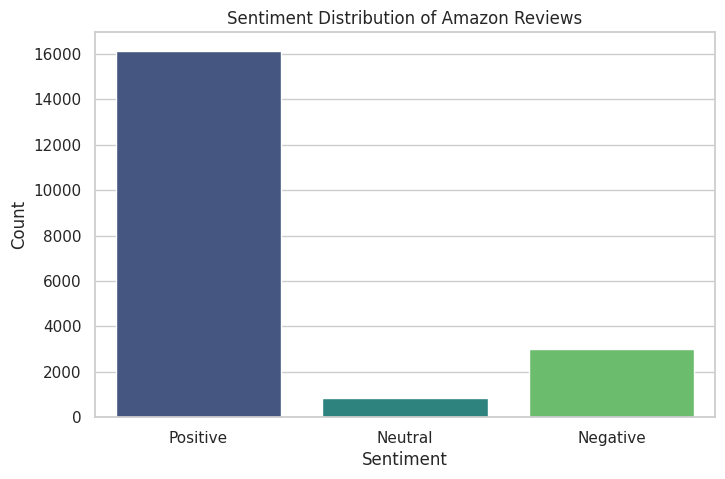

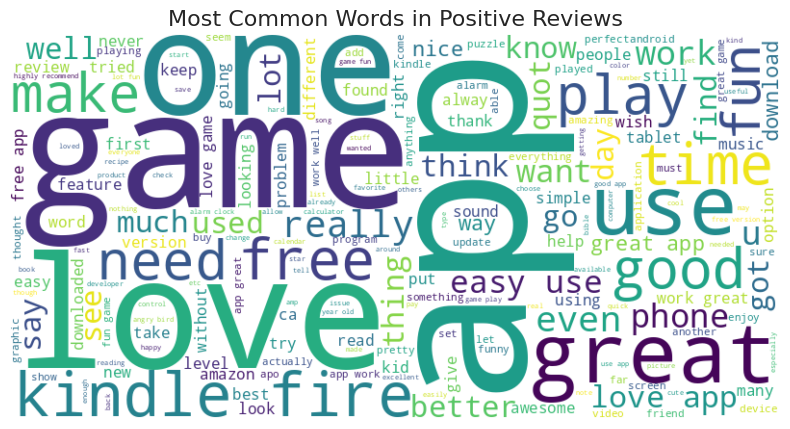

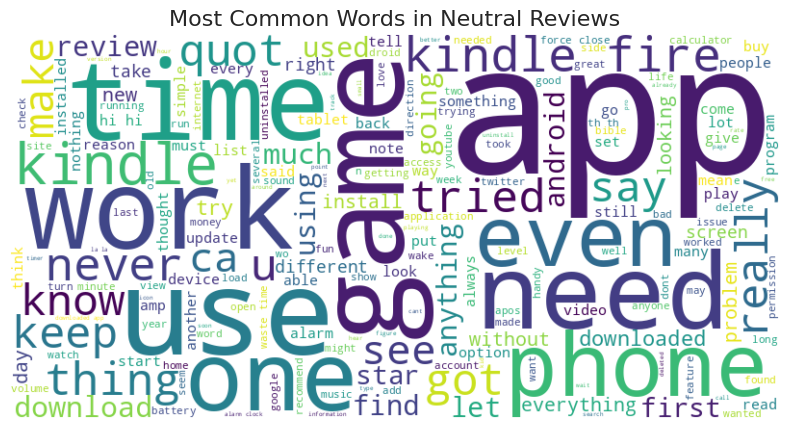

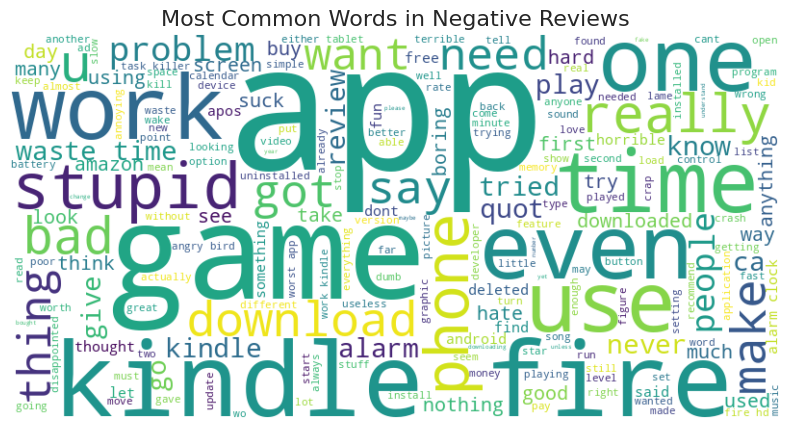

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Install necessary libraries
!pip install wordcloud

# Imports
import pandas as pd
import nltk
# Download necessary NLTK datasets
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')  # Lemmatizer
nltk.download('vader_lexicon')  # Sentiment lexicon
nltk.download('punkt_tab') # Add this line to download punkt_tab
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files

# Download necessary NLTK datasets
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')  # Lemmatizer
nltk.download('vader_lexicon')  # Sentiment lexicon

# Load the dataset from PyCaret (Amazon reviews)
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

# Save original review text
df['originalReview'] = df['reviewText']

# Text preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()  # Lemmatization
    lemmatised_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatised_tokens)

# Apply preprocessing
df['reviewText'] = df['originalReview'].astype(str).apply(preprocess_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Define sentiment classification
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

# Plot sentiment distribution
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title('Sentiment Distribution of Amazon Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud function
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Word clouds for each sentiment
for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['sentiment'] == sentiment]['reviewText'])
    generate_wordcloud(text, f'Most Common Words in {sentiment} Reviews')

# Export to CSV
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
filename = f'amazon_reviews_with_sentiment_{timestamp}.csv'
columns_to_export = ['originalReview', 'reviewText', 'sentiment_score', 'sentiment']
df[columns_to_export].to_csv(filename, index=False)
files.download(filename)
